# Model Comparison: All STAT 441 Classification Methods

This notebook aggregates and compares results from all trained classification models:

**Linear Methods:**
- Logistic Regression (Standard, L1, L2)

**Instance-Based:**
- k-Nearest Neighbors

**Bayesian:**
- Naive Bayes (Gaussian)

**Tree-Based:**
- Decision Tree (CART)
- Bagging
- Random Forest
- AdaBoost
- Gradient Boosting
- XGBoost

**Kernel Methods:**
- SVM (Linear)
- SVM (RBF Kernel)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from utils import load_all_results, plot_model_comparison, CLASSES

plt.style.use('seaborn-v0_8-whitegrid')
print("Libraries loaded successfully!")


Libraries loaded successfully!


## 1. Load All Results


In [2]:
# Load all saved results
all_results = load_all_results()

# Create comprehensive DataFrame
results_df = pd.DataFrame([
    {
        'Model': r['model_name'],
        'Features': r['feature_type'],
        'Accuracy': r['accuracy'],
        'Balanced Accuracy': r['balanced_accuracy'],
        'F1 (Macro)': r['f1_macro'],
        'F1 (Weighted)': r['f1_weighted'],
        'Precision (Macro)': r['precision_macro'],
        'Recall (Macro)': r['recall_macro'],
        'ROC-AUC': r['roc_auc']
    }
    for r in all_results
])

print(f"Loaded {len(results_df)} model results")
results_df


Loaded 26 result entries
Loaded 26 model results


,Model,Features,Accuracy,Balanced Accuracy,F1 (Macro),F1 (Weighted),Precision (Macro),Recall (Macro),ROC-AUC
0,Decision Tree,raw,0.876768,0.836973,0.819434,0.877774,0.804682,0.836973,0.878620
1,Decision Tree,engineered,0.838384,0.769707,0.759128,0.839935,0.749425,0.769707,0.825643
2,XGBoost,raw,0.906061,0.915872,0.868618,0.908667,0.832356,0.915872,0.981808
3,XGBoost,engineered,0.872727,0.884345,0.823893,0.877262,0.782057,0.884345,0.968032
4,kNN (k=5),raw,0.925253,0.872437,0.885235,0.924492,0.899079,0.872437,0.965739
5,kNN (k=7),engineered,0.872727,0.738162,0.789383,0.865492,0.866511,0.738162,0.940597
6,Logistic Regression (Standard),raw,0.909596,0.925576,0.868652,0.912677,0.827419,0.925576,0.987109
7,Logistic Regression (Standard),engineered,0.801515,0.853810,0.744852,0.813044,0.695001,0.853810,0.946896
8,Logistic Regression (L1/Lasso),raw,0.910101,0.927358,0.869894,0.913159,0.828327,0.927358,0.987304
9,Logistic Regression (L1/Lasso),engineered,0.802525,0.853462,0.745890,0.813854,0.696025,0.853462,0.946795


## 2. Overall Performance Comparison


In [3]:
# Sort by F1 (Macro) - our primary metric for imbalanced data
print("=" * 100)
print("ALL MODELS RANKED BY MACRO F1 SCORE")
print("=" * 100)
print(results_df.sort_values('F1 (Macro)', ascending=False).to_string(index=False))


ALL MODELS RANKED BY MACRO F1 SCORE
                         Model   Features  Accuracy  Balanced Accuracy  F1 (Macro)  F1 (Weighted)  Precision (Macro)  Recall (Macro)  ROC-AUC
                     kNN (k=5)        raw  0.925253           0.872437    0.885235       0.924492           0.899079        0.872437 0.965739
                     SVM (RBF)        raw  0.917172           0.923462    0.880282       0.919335           0.846309        0.923462 0.987613
                 Random Forest        raw  0.923232           0.855395    0.879647       0.921097           0.911084        0.855395 0.980903
             Gradient Boosting        raw  0.918182           0.835019    0.870628       0.915177           0.917100        0.835019 0.976320
      Bagging (Decision Trees)        raw  0.917172           0.851261    0.870304       0.915539           0.893237        0.851261 0.975784
Logistic Regression (L1/Lasso)        raw  0.910101           0.927358    0.869894       0.913159           0.82

In [4]:
# Best model per feature type
print("\n" + "=" * 80)
print("BEST MODELS BY FEATURE TYPE")
print("=" * 80)

for ft in ['raw', 'engineered']:
    subset = results_df[results_df['Features'] == ft]
    best_idx = subset['F1 (Macro)'].idxmax()
    best = subset.loc[best_idx]
    print(f"\n{ft.upper()} Features:")
    print(f"  Best Model: {best['Model']}")
    print(f"  F1 (Macro): {best['F1 (Macro)']:.4f}")
    print(f"  Balanced Accuracy: {best['Balanced Accuracy']:.4f}")
    print(f"  ROC-AUC: {best['ROC-AUC']:.4f}" if pd.notna(best['ROC-AUC']) else "  ROC-AUC: N/A")



BEST MODELS BY FEATURE TYPE

RAW Features:
  Best Model: kNN (k=5)
  F1 (Macro): 0.8852
  Balanced Accuracy: 0.8724
  ROC-AUC: 0.9657

ENGINEERED Features:
  Best Model: Random Forest
  F1 (Macro): 0.8365
  Balanced Accuracy: 0.8520
  ROC-AUC: 0.9637


## 3. Visualizations


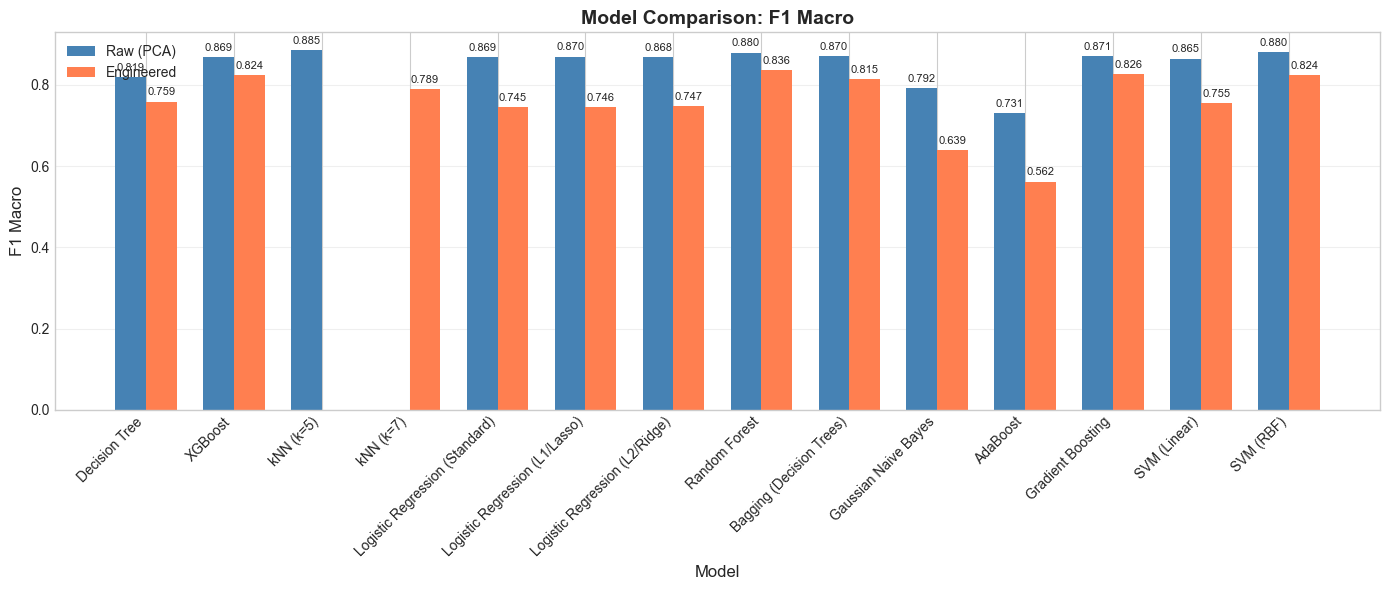

In [5]:
# Macro F1 comparison
plot_model_comparison(all_results, metric='f1_macro')


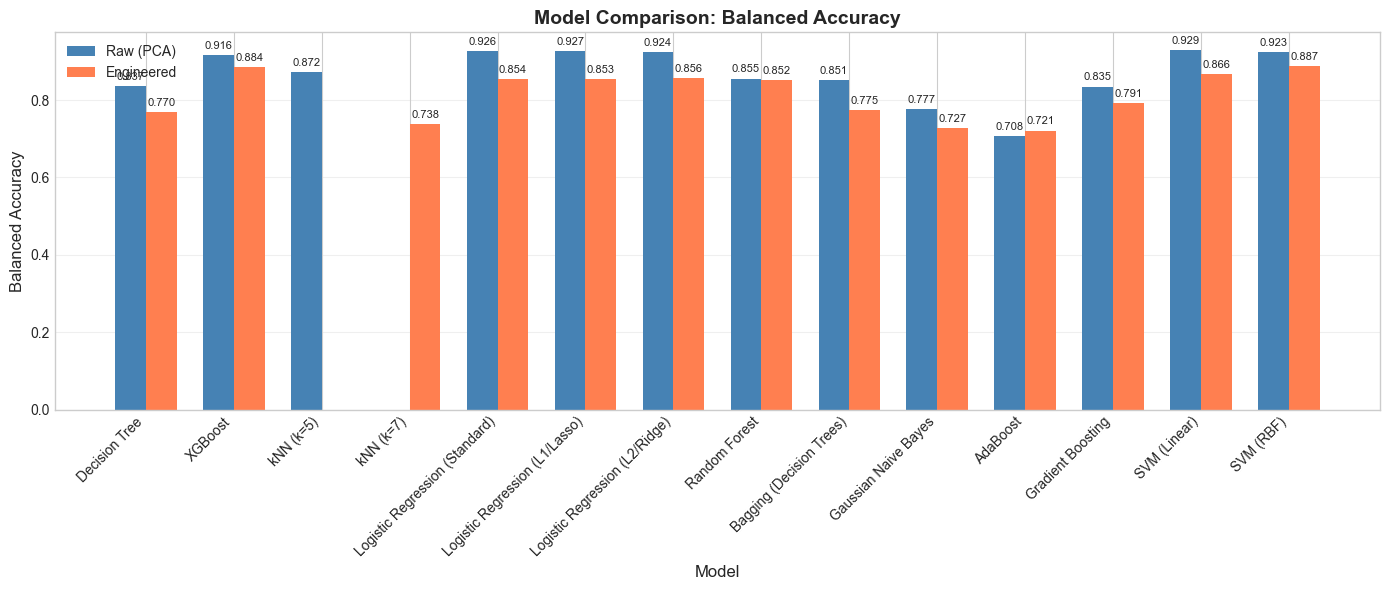

In [6]:
# Balanced Accuracy comparison
plot_model_comparison(all_results, metric='balanced_accuracy')


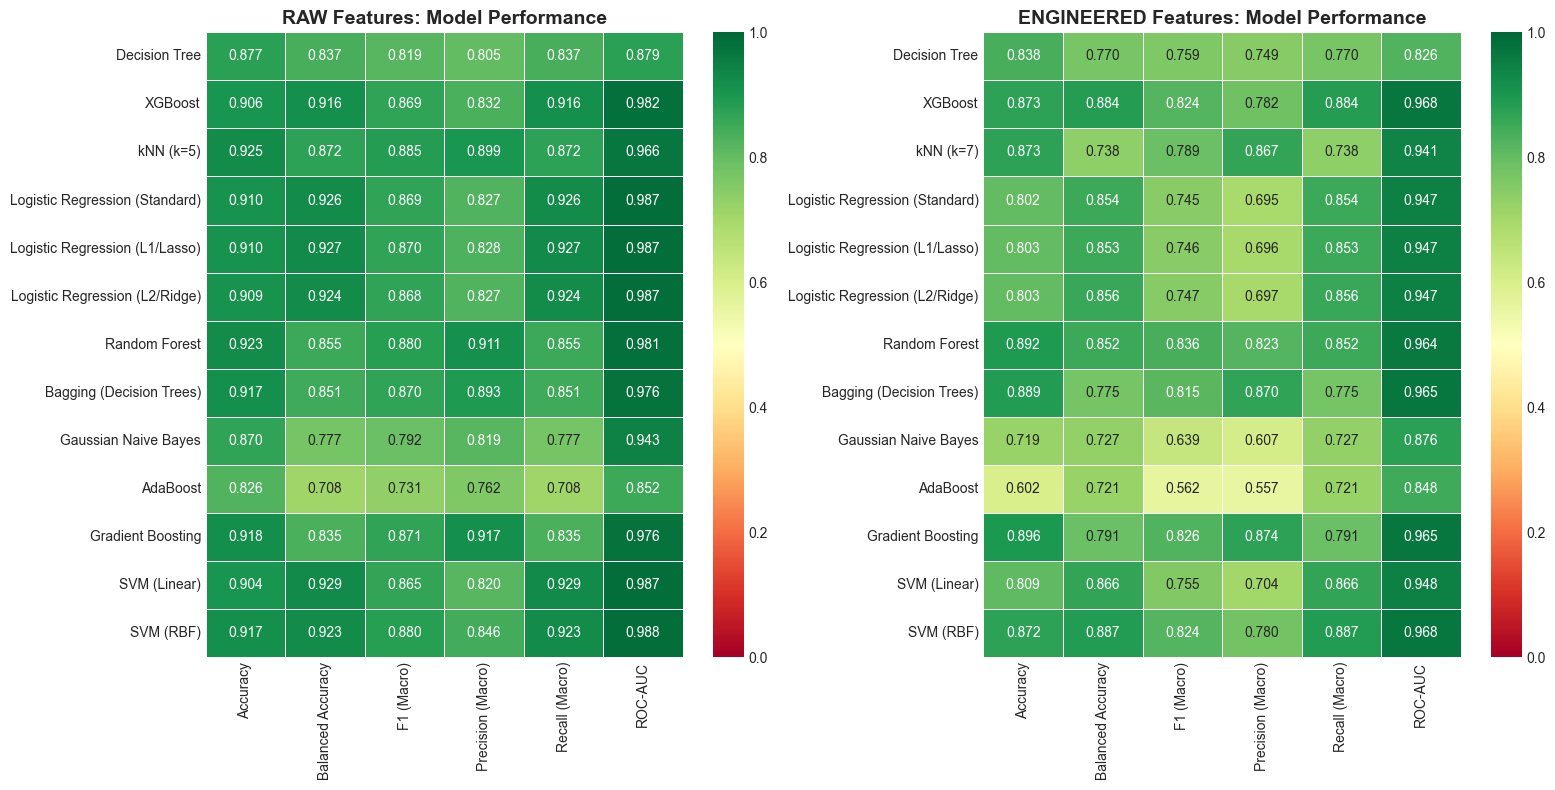

In [7]:
# Heatmap of all metrics
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for i, ft in enumerate(['raw', 'engineered']):
    subset = results_df[results_df['Features'] == ft].copy()
    subset = subset.set_index('Model')
    metrics = ['Accuracy', 'Balanced Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)']
    
    # Handle potential NaN in ROC-AUC
    if subset['ROC-AUC'].notna().all():
        metrics.append('ROC-AUC')
    
    heatmap_data = subset[metrics]
    
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', 
                ax=axes[i], vmin=0, vmax=1, linewidths=0.5)
    axes[i].set_title(f'{ft.upper()} Features: Model Performance', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


## 4. Raw vs Engineered Features Comparison


F1 Score Comparison: Engineered vs Raw Features
(Positive = Engineered features perform better)

                                  Raw F1    Eng F1  Difference
Model                                                         
Random Forest                   0.879647  0.836483   -0.043164
Gradient Boosting               0.870628  0.826091   -0.044537
XGBoost                         0.868618  0.823893   -0.044725
Bagging (Decision Trees)        0.870304  0.815016   -0.055288
SVM (RBF)                       0.880282  0.823576   -0.056706
Decision Tree                   0.819434  0.759128   -0.060306
SVM (Linear)                    0.864703  0.755446   -0.109257
Logistic Regression (L2/Ridge)  0.867686  0.746940   -0.120746
Logistic Regression (Standard)  0.868652  0.744852   -0.123800
Logistic Regression (L1/Lasso)  0.869894  0.745890   -0.124005
Gaussian Naive Bayes            0.791942  0.638914   -0.153028
AdaBoost                        0.731250  0.562007   -0.169242


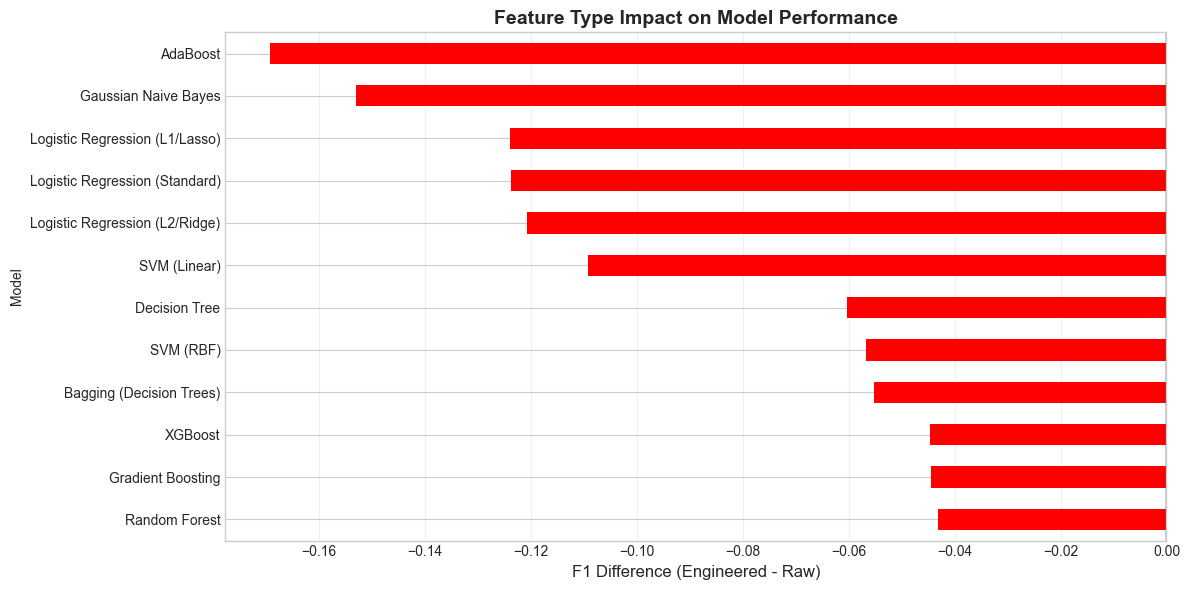

In [8]:
# Compare raw vs engineered for each model
raw_df = results_df[results_df['Features'] == 'raw'].set_index('Model')
eng_df = results_df[results_df['Features'] == 'engineered'].set_index('Model')

comparison_df = pd.DataFrame({
    'Raw F1': raw_df['F1 (Macro)'],
    'Eng F1': eng_df['F1 (Macro)'],
    'Difference': eng_df['F1 (Macro)'] - raw_df['F1 (Macro)']
}).dropna()

comparison_df = comparison_df.sort_values('Difference', ascending=False)

print("F1 Score Comparison: Engineered vs Raw Features")
print("="*60)
print("(Positive = Engineered features perform better)")
print()
print(comparison_df.to_string())

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['green' if x > 0 else 'red' for x in comparison_df['Difference']]
comparison_df['Difference'].plot(kind='barh', ax=ax, color=colors)

ax.axvline(x=0, color='black', linewidth=1)
ax.set_xlabel('F1 Difference (Engineered - Raw)', fontsize=12)
ax.set_title('Feature Type Impact on Model Performance', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## 5. Summary and Recommendations


In [9]:
# Overall best model
best_overall_idx = results_df['F1 (Macro)'].idxmax()
best_overall = results_df.loc[best_overall_idx]

print("=" * 80)
print("FINAL RECOMMENDATIONS")
print("=" * 80)

print(f"\n1. BEST OVERALL MODEL:")
print(f"   Model: {best_overall['Model']}")
print(f"   Features: {best_overall['Features']}")
print(f"   F1 (Macro): {best_overall['F1 (Macro)']:.4f}")
print(f"   Balanced Accuracy: {best_overall['Balanced Accuracy']:.4f}")

print("\n2. MODEL CATEGORIES SUMMARY:")
print("   - Linear Methods: Good interpretability, moderate performance")
print("   - Tree Ensembles: Strong performance, feature importance available")
print("   - SVM: Competitive with proper tuning")
print("   - kNN/Naive Bayes: Simple baselines")

print("\n3. FEATURE TYPE IMPACT:")
avg_raw = results_df[results_df['Features'] == 'raw']['F1 (Macro)'].mean()
avg_eng = results_df[results_df['Features'] == 'engineered']['F1 (Macro)'].mean()
print(f"   Average F1 (Raw/PCA): {avg_raw:.4f}")
print(f"   Average F1 (Engineered): {avg_eng:.4f}")
if avg_eng > avg_raw:
    print("   --> Engineered features generally perform better")
else:
    print("   --> Raw features generally perform better")

print("\n4. CLASS IMBALANCE HANDLING:")
print("   - All models used class_weight='balanced' or sample weights")
print("   - Evaluated with Macro F1 and Balanced Accuracy (not just Accuracy)")
print("   - Minority classes (left, right) had lower per-class recall")


FINAL RECOMMENDATIONS

1. BEST OVERALL MODEL:
   Model: kNN (k=5)
   Features: raw
   F1 (Macro): 0.8852
   Balanced Accuracy: 0.8724

2. MODEL CATEGORIES SUMMARY:
   - Linear Methods: Good interpretability, moderate performance
   - Tree Ensembles: Strong performance, feature importance available
   - SVM: Competitive with proper tuning
   - kNN/Naive Bayes: Simple baselines

3. FEATURE TYPE IMPACT:
   Average F1 (Raw/PCA): 0.8514
   Average F1 (Engineered): 0.7590
   --> Raw features generally perform better

4. CLASS IMBALANCE HANDLING:
   - All models used class_weight='balanced' or sample weights
   - Evaluated with Macro F1 and Balanced Accuracy (not just Accuracy)
   - Minority classes (left, right) had lower per-class recall


## 6. Course Concepts Applied

### Bias-Variance Tradeoff
- Simple models (Logistic, Naive Bayes): Higher bias, lower variance
- Complex models (Random Forest, XGBoost): Lower bias, higher variance
- Regularization (L1, L2, tree pruning) controls this tradeoff

### Cross-Validation
- Used 5-fold stratified CV for hyperparameter tuning
- Maintained class proportions in each fold

### Ensemble Methods
- Bagging reduces variance (Random Forest)
- Boosting reduces bias (AdaBoost, Gradient Boosting, XGBoost)

### Feature Engineering
- Domain-specific features (edges, spatial, texture) vs raw pixels
- PCA for dimensionality reduction and multicollinearity

### Evaluation for Imbalanced Data
- Macro F1 treats all classes equally
- Balanced Accuracy averages recall per class
- Confusion matrices reveal per-class performance
